1.NECESSARY IMPORTS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df=pd.read_csv("winequality-red.csv")
cols=df.columns

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

2.BARPLOTS

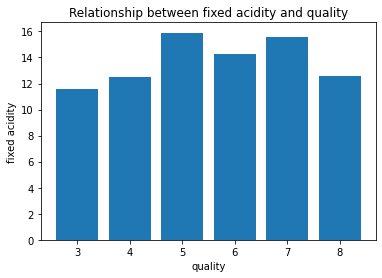

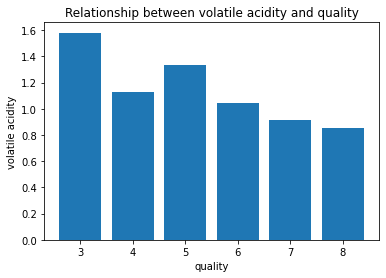

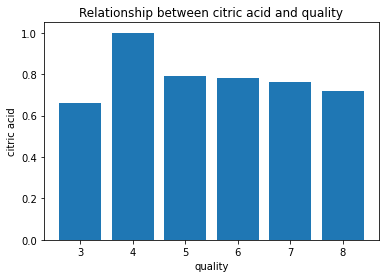

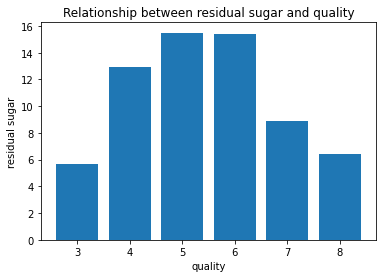

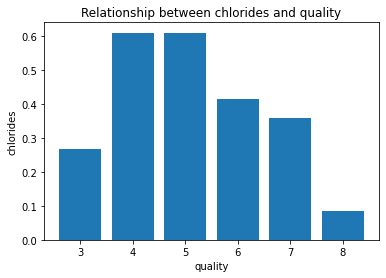

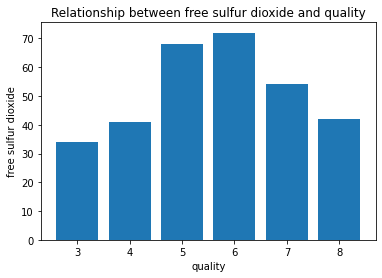

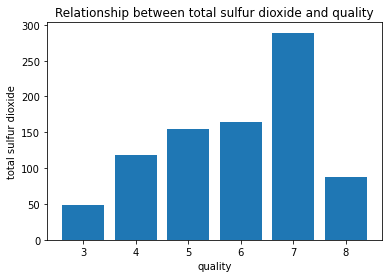

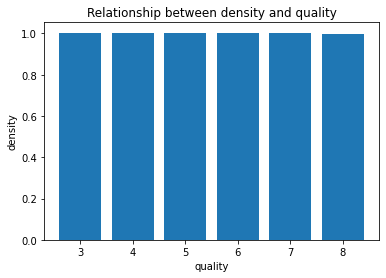

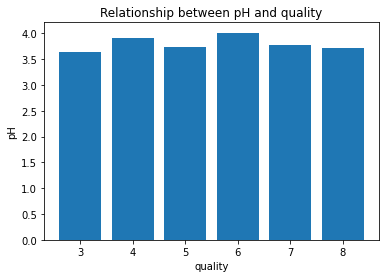

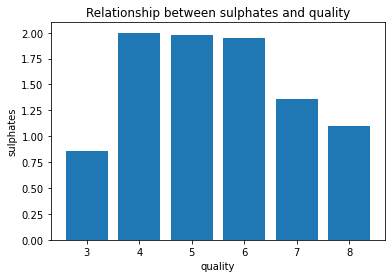

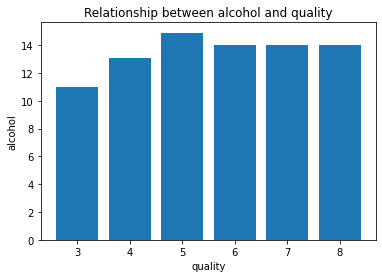

In [6]:

plt.bar(df['quality'], df['fixed acidity'])
plt.title('Relationship between fixed acidity and quality')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

plt.bar(df['quality'], df['volatile acidity'])
plt.title('Relationship between volatile acidity and quality')
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

plt.bar(df['quality'], df['citric acid'])
plt.title('Relationship between citric acid and quality')
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

plt.bar(df['quality'], df['residual sugar'])
plt.title('Relationship between residual sugar and quality')
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

plt.bar(df['quality'], df['chlorides'])
plt.title('Relationship between chlorides and quality')
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

plt.bar(df['quality'], df['free sulfur dioxide'])
plt.title('Relationship between free sulfur dioxide and quality')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()

plt.bar(df['quality'], df['total sulfur dioxide'])
plt.title('Relationship between total sulfur dioxide and quality')
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

plt.bar(df['quality'], df['density'])
plt.title('Relationship between density and quality')
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

plt.bar(df['quality'], df['pH'])
plt.title('Relationship between pH and quality')
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

plt.bar(df['quality'], df['sulphates'])
plt.title('Relationship between sulphates and quality')
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


3.FINDING CORRELATIONS

In [7]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


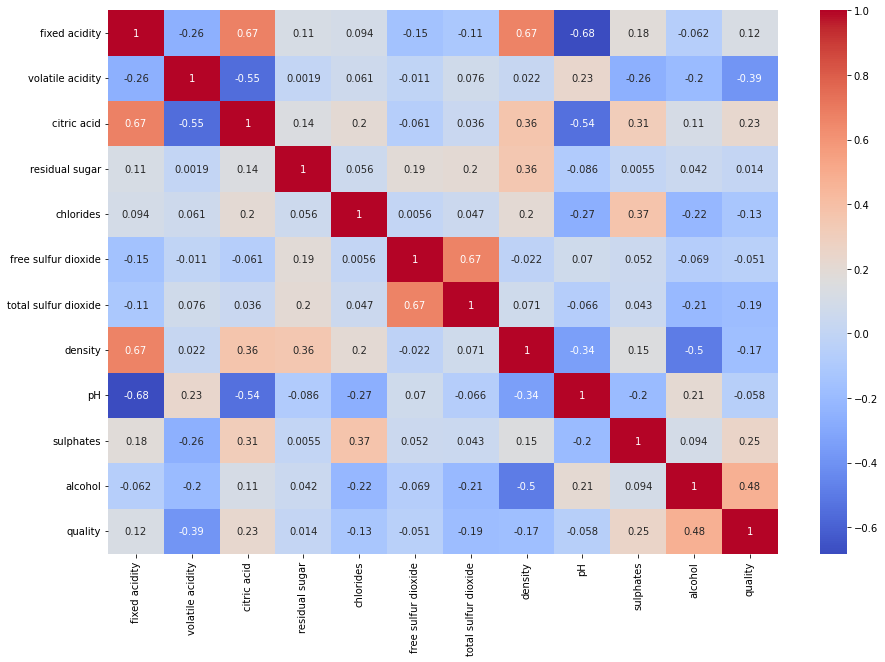

In [8]:
plt.figure(figsize=(15,10))
corr=df.corr()
sb.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

4."yes" MEANS GOOD WINE "no" MEANS BAD WINE

In [9]:
df["quality"] = ["no" if i<7 else "yes" for i in df["quality"]]

5.TRAINING DATASET

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,no
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,no
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,no
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,no
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,no
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,no
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,no
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,no


In [11]:
y=df["quality"]
y.value_counts()

no     1382
yes     217
Name: quality, dtype: int64

e:\1.PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


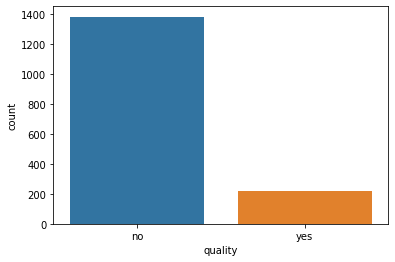

In [12]:
sb.countplot(y)
plt.show()

In [13]:
x=df.drop("quality",axis=1)
y=df["quality"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=101, stratify = y)

In [15]:
sc=StandardScaler()

In [16]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

<b>USING DESCISION TREES<b>

In [17]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
prd=dt.predict(x_test)

6.TEST DATASET WITH PREDICTED RESULTS

In [23]:
res=pd.DataFrame(x_test,columns=df.columns.drop("quality"))
res.join(pd.DataFrame(prd,columns=['good wine']))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
0,2.159382,-1.480353,1.085281,0.442090,-0.187421,1.082886,0.013720,1.406411,-0.689139,0.728581,-0.176734,yes
1,0.250536,-1.126572,0.677125,2.600743,-0.281796,-0.841736,-0.985509,-0.096247,-0.070557,-0.246472,1.675926,yes
2,-0.076695,0.406480,-1.414676,-0.020478,0.032785,0.258048,0.377077,1.903614,1.166607,-0.083963,-1.054310,no
3,0.577767,-0.124192,0.319988,0.827564,-0.140234,-1.025033,-0.955230,1.074942,-0.132415,-0.788168,0.310808,no
4,-0.240310,-1.244499,0.217949,-0.483047,-0.391899,-0.200195,-0.289076,-1.720443,0.609883,-0.571489,2.163468,no
...,...,...,...,...,...,...,...,...,...,...,...,...
315,-0.294848,-0.772791,0.728145,-0.405952,-0.077318,-0.658438,-0.743272,-0.825478,0.486167,-0.029793,1.188384,yes
316,2.213920,-0.713827,1.187321,-0.405952,-0.502002,-0.933384,-0.652433,1.461656,-1.678871,-0.354811,-1.054310,no
317,1.559459,-0.124192,2.360770,2.022533,0.142889,-1.025033,-0.864391,1.572145,-0.565423,-0.246472,0.798350,no
318,0.468690,-0.654864,1.136301,-0.020478,-0.564919,-0.383492,-0.622153,-0.858625,0.176876,0.674412,2.846027,yes


7.DECISION TREE METRICS

In [22]:
accuracy=accuracy_score(y_test, prd)
print(accuracy*100,"%")
print(confusion_matrix(y_test, prd))
print(classification_report(y_test, prd))

82.8125 %
[[240  37]
 [ 18  25]]
              precision    recall  f1-score   support

          no       0.93      0.87      0.90       277
         yes       0.40      0.58      0.48        43

    accuracy                           0.83       320
   macro avg       0.67      0.72      0.69       320
weighted avg       0.86      0.83      0.84       320



<b>USING RANDOM FORESTS<b>

In [25]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
prd=rf.predict(x_test)

8.TEST DATASET WITH PREDICTED RESULTS

In [26]:
res=pd.DataFrame(x_test,columns=df.columns.drop("quality"))
res.join(pd.DataFrame(prd,columns=['good wine']))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
0,2.159382,-1.480353,1.085281,0.442090,-0.187421,1.082886,0.013720,1.406411,-0.689139,0.728581,-0.176734,no
1,0.250536,-1.126572,0.677125,2.600743,-0.281796,-0.841736,-0.985509,-0.096247,-0.070557,-0.246472,1.675926,yes
2,-0.076695,0.406480,-1.414676,-0.020478,0.032785,0.258048,0.377077,1.903614,1.166607,-0.083963,-1.054310,no
3,0.577767,-0.124192,0.319988,0.827564,-0.140234,-1.025033,-0.955230,1.074942,-0.132415,-0.788168,0.310808,no
4,-0.240310,-1.244499,0.217949,-0.483047,-0.391899,-0.200195,-0.289076,-1.720443,0.609883,-0.571489,2.163468,no
...,...,...,...,...,...,...,...,...,...,...,...,...
315,-0.294848,-0.772791,0.728145,-0.405952,-0.077318,-0.658438,-0.743272,-0.825478,0.486167,-0.029793,1.188384,no
316,2.213920,-0.713827,1.187321,-0.405952,-0.502002,-0.933384,-0.652433,1.461656,-1.678871,-0.354811,-1.054310,no
317,1.559459,-0.124192,2.360770,2.022533,0.142889,-1.025033,-0.864391,1.572145,-0.565423,-0.246472,0.798350,no
318,0.468690,-0.654864,1.136301,-0.020478,-0.564919,-0.383492,-0.622153,-0.858625,0.176876,0.674412,2.846027,yes


9.RANDOM FORESTS METRICS

In [28]:
acc=accuracy_score(y_test,prd)
print(acc*100,"%")
print(confusion_matrix(y_test,prd))
print(classification_report(y_test,prd))

89.375 %
[[272   5]
 [ 29  14]]
              precision    recall  f1-score   support

          no       0.90      0.98      0.94       277
         yes       0.74      0.33      0.45        43

    accuracy                           0.89       320
   macro avg       0.82      0.65      0.70       320
weighted avg       0.88      0.89      0.88       320

